In [1]:
from config import *
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("auc_all.csv")

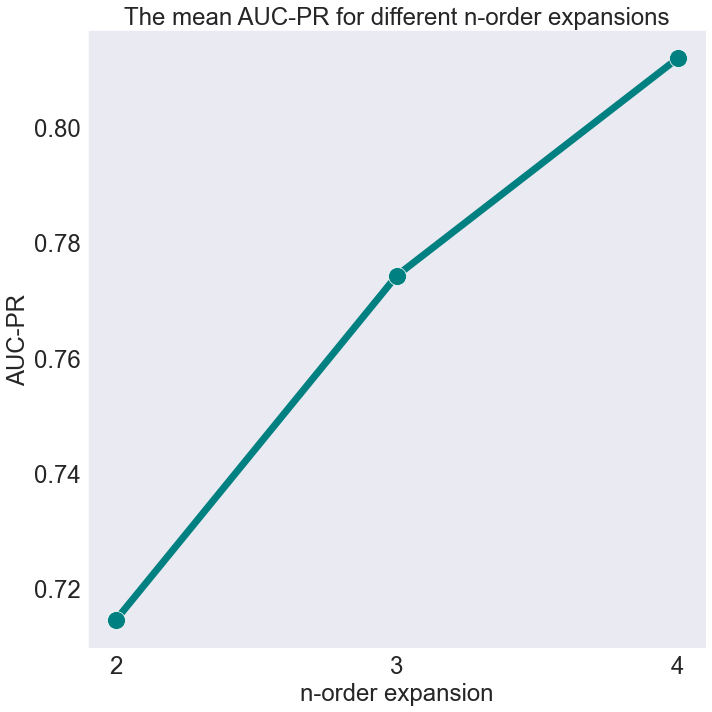

In [3]:
mean_pr_df = df[list(df.filter(regex='PR'))].mean(axis=0).rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")
plt.figure(figsize=(10, 10))
lineplot = sns.lineplot(data=mean_pr_df, color="teal", marker='o', markersize=18, linewidth=7)
lineplot.set_title("The mean AUC-PR for different n-order expansions", fontsize=24)
lineplot.set_xlabel('n-order expansion',fontsize = 24)
lineplot.set_ylabel('AUC-PR',fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.grid()
plt.tight_layout()
plt.show()
del(mean_pr_df)

Mean (GM, HM, AM)        0.847965
Neighbor (CN, JC, AA)    0.685871
dtype: float64


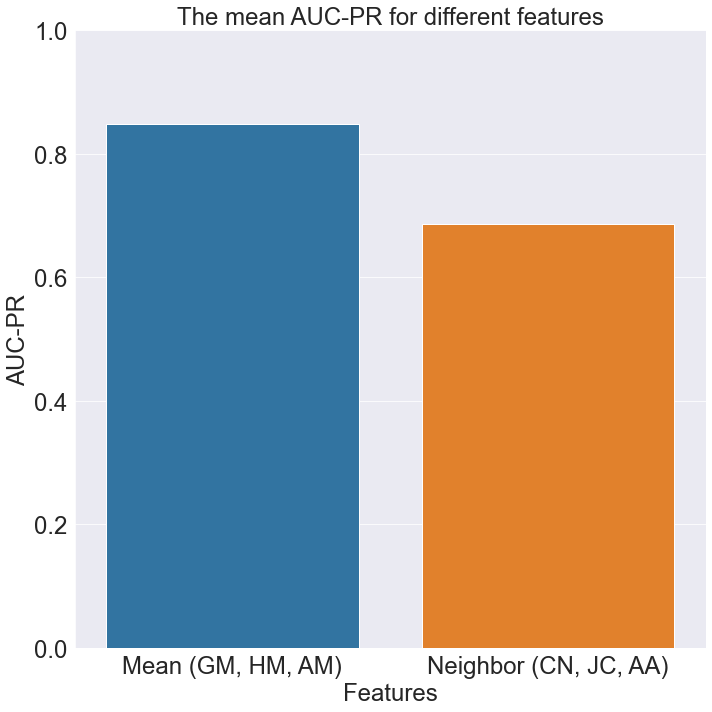

In [4]:
mean_df = {}
mean_mdf = pd.concat([df[df.setting.str.contains("seed-9_" + x)].mean(axis=0) for x in ["gm", "hm", "am"]], keys=["gm", "hm", "am"], axis=1).transpose()
mean_mdf = mean_mdf[list(mean_mdf.filter(regex='PR'))].mean(axis=1).rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")

mean_ndf = pd.concat([df[df.setting.str.contains("seed-9_" + x)].mean(axis=0) for x in ["cn", "jc", "aa"]], keys=["cn", "jc", "aa"], axis=1).transpose()
mean_ndf = mean_ndf[list(mean_ndf.filter(regex='PR'))].mean(axis=1).rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")

mean_df["Mean (GM, HM, AM)"] = mean_mdf.mean()
mean_df["Neighbor (CN, JC, AA)"] = mean_ndf.mean()

mean_df = pd.Series(data=mean_df)
print(mean_df)
plt.figure(figsize=(10, 10))
barplot = sns.barplot(x=mean_df.index, y=mean_df.values)

#barplot = sns.barplot(data=mean_pr_hedge, color="teal", marker='o', markersize=18, linewidth=7)
barplot.set_title("The mean AUC-PR for different features", fontsize=24)
barplot.set_xlabel('Features',fontsize = 24)
barplot.set_ylabel('AUC-PR',fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylim((0, 1))
#plt.grid()
plt.tight_layout()
plt.show()
del(mean_df, mean_mdf, mean_ndf)

In [5]:
df

,setting,Graph Name,PR1,PR2,ROC1,ROC2,PR3,ROC3
0,hedge-4_negtype-clique-1_seed-9_aa,email-Eu,0.947876,0.960641,0.679197,0.736773,NaN,NaN
1,hedge-4_negtype-clique-1_seed-9_aa,email-Enron,0.937309,0.934636,0.613527,0.584541,NaN,NaN
2,hedge-4_negtype-clique-1_seed-9_am,email-Eu,0.981425,0.981406,0.855753,0.852273,NaN,NaN
3,hedge-4_negtype-clique-1_seed-9_am,email-Enron,0.982553,0.978738,0.855072,0.833333,NaN,NaN
4,hedge-4_negtype-clique-1_seed-9_cn,email-Eu,0.945537,0.964621,0.672380,0.748826,NaN,NaN
...,...,...,...,...,...,...,...,...
283,hedge-5_negtype-tailed-5_seed-9_gm,email-Enron,0.944398,0.944398,0.921875,0.921875,0.944398,0.921875
284,hedge-5_negtype-tailed-5_seed-9_hm,email-Eu,0.663532,0.862787,0.814119,0.909446,0.864576,0.911407
285,hedge-5_negtype-tailed-5_seed-9_hm,email-Enron,0.771594,0.894084,0.845332,0.911788,0.894825,0.911788
286,hedge-5_negtype-tailed-5_seed-9_jc,email-Eu,0.454088,0.500391,0.709365,0.750585,0.670287,0.823604


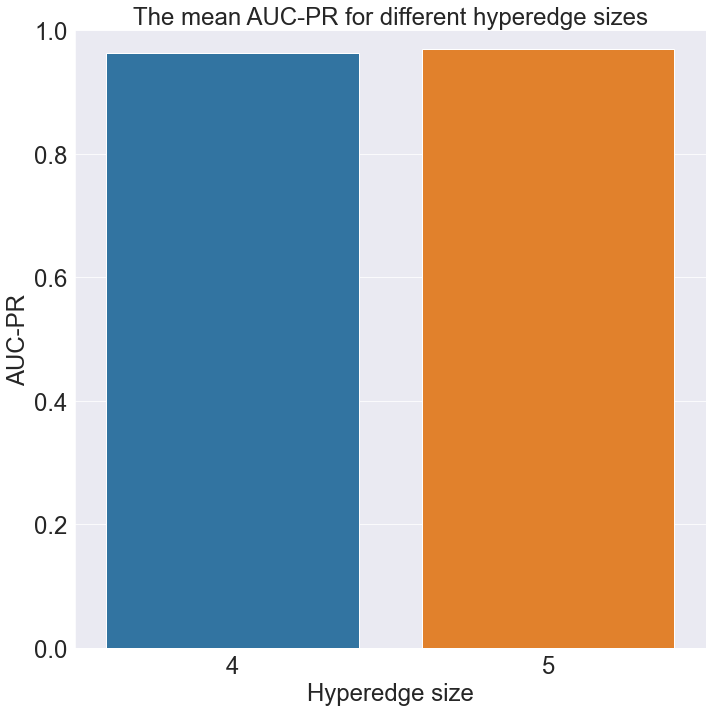

In [6]:
mean_pr_hedge = pd.concat([df[df.setting.str.contains("hedge-{}_negtype-clique-1_".format(x))].mean(axis=0) for x in HEDGE_SIZES], keys=HEDGE_SIZES, axis=1).transpose()
mean_pr_hedge = mean_pr_hedge[list(mean_pr_hedge.filter(regex='PR'))].mean(axis=1).rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")

plt.figure(figsize=(10, 10))
barplot = sns.barplot(x=mean_pr_hedge.index, y=mean_pr_hedge.values)

#barplot = sns.barplot(data=mean_pr_hedge, color="teal", marker='o', markersize=18, linewidth=7)
barplot.set_title("The mean AUC-PR for different hyperedge sizes", fontsize=24)
barplot.set_xlabel('Hyperedge size',fontsize = 24)
barplot.set_ylabel('AUC-PR',fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylim((0, 1))
#plt.grid()
plt.tight_layout()
plt.show()
del(mean_pr_hedge)

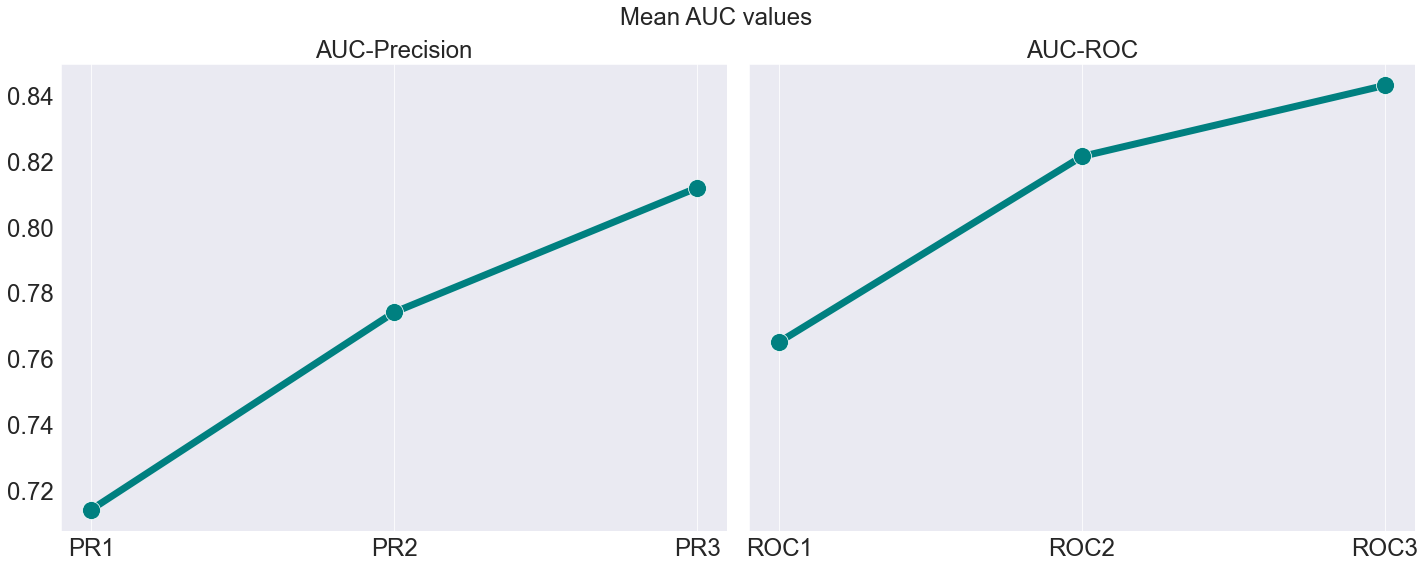

In [7]:
fsize=24
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
fig.suptitle("Mean AUC values", fontsize = fsize)

sns.lineplot(ax=axes[0], data=df[list(df.filter(regex='PR'))].mean(axis=0), color="teal", marker='o', markersize=18, linewidth=7)
axes[0].set_title('AUC-Precision', fontsize=fsize)
axes[0].grid(axis='y')
axes[0].tick_params(axis='both', which='major', labelsize=fsize)

sns.lineplot(ax=axes[1], data=df[list(df.filter(regex='ROC'))].mean(axis=0), color="teal", marker='o', markersize=18, linewidth=7)
axes[1].set_title('AUC-ROC', fontsize = fsize)
axes[1].grid(axis='y')
axes[1].tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
plt.show()

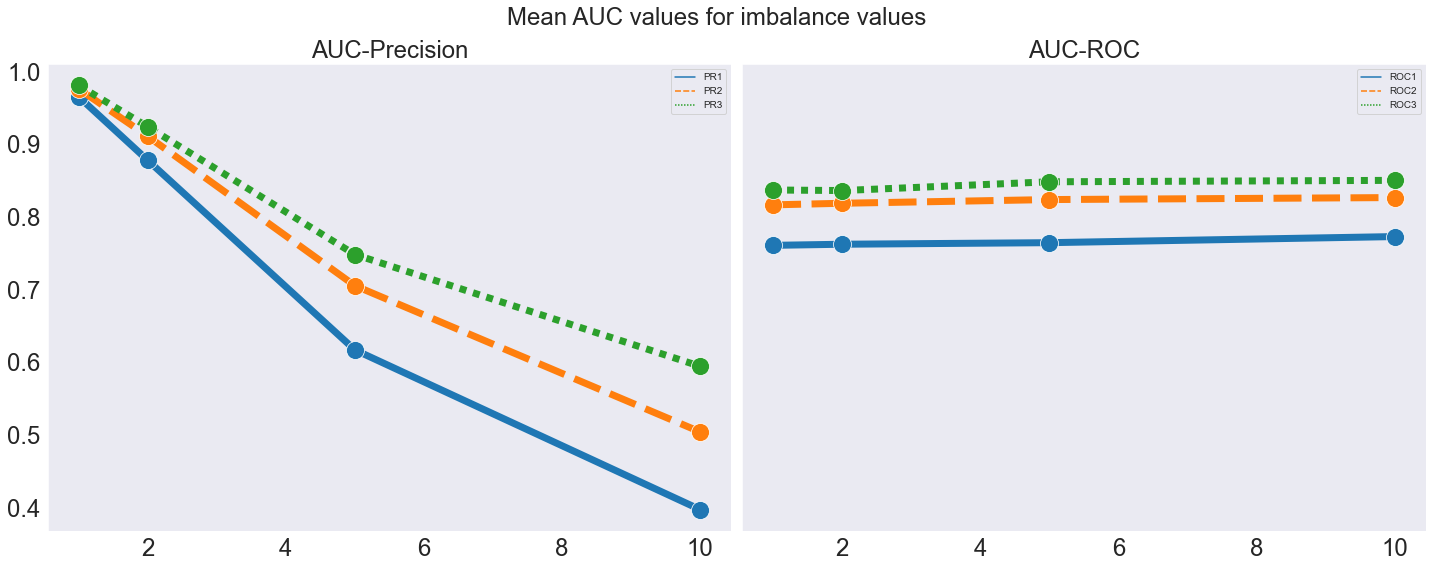

In [8]:
imbs_df = pd.concat([df[df.setting.str.contains(str(x) + "_seed-9")].mean(axis=0) for x in IMBS], keys=IMBS, axis=1).transpose()

fsize=24
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
fig.suptitle("Mean AUC values for imbalance values", fontsize = fsize)

sns.lineplot(ax=axes[0], data=imbs_df[list(imbs_df.filter(regex='PR'))], color="teal", marker='o', markersize=18, linewidth=7)
axes[0].set_title('AUC-Precision', fontsize=fsize)
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labelsize=fsize)

sns.lineplot(ax=axes[1], data=imbs_df[list(imbs_df.filter(regex='ROC'))], color="teal", marker='o', markersize=18, linewidth=7)
axes[1].set_title('AUC-ROC', fontsize = fsize)
axes[1].grid()
axes[1].tick_params(axis='both', which='major', labelsize=fsize)
plt.tight_layout()
plt.show()

In [9]:
df

,setting,Graph Name,PR1,PR2,ROC1,ROC2,PR3,ROC3
0,hedge-4_negtype-clique-1_seed-9_aa,email-Eu,0.947876,0.960641,0.679197,0.736773,NaN,NaN
1,hedge-4_negtype-clique-1_seed-9_aa,email-Enron,0.937309,0.934636,0.613527,0.584541,NaN,NaN
2,hedge-4_negtype-clique-1_seed-9_am,email-Eu,0.981425,0.981406,0.855753,0.852273,NaN,NaN
3,hedge-4_negtype-clique-1_seed-9_am,email-Enron,0.982553,0.978738,0.855072,0.833333,NaN,NaN
4,hedge-4_negtype-clique-1_seed-9_cn,email-Eu,0.945537,0.964621,0.672380,0.748826,NaN,NaN
...,...,...,...,...,...,...,...,...
283,hedge-5_negtype-tailed-5_seed-9_gm,email-Enron,0.944398,0.944398,0.921875,0.921875,0.944398,0.921875
284,hedge-5_negtype-tailed-5_seed-9_hm,email-Eu,0.663532,0.862787,0.814119,0.909446,0.864576,0.911407
285,hedge-5_negtype-tailed-5_seed-9_hm,email-Enron,0.771594,0.894084,0.845332,0.911788,0.894825,0.911788
286,hedge-5_negtype-tailed-5_seed-9_jc,email-Eu,0.454088,0.500391,0.709365,0.750585,0.670287,0.823604


In [10]:
df.setting.str.contains(str(1) + "_seed-9")

0       True
1       True
2       True
3       True
4       True
       ...  
283    False
284    False
285    False
286    False
287    False
Name: setting, Length: 288, dtype: bool

In [11]:
tdf = df[df.setting.str.contains(str(1) + "_seed-9")][["Graph Name", "setting"] + list(df.filter(regex='PR'))].rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")

In [12]:
def getNegSampling(val, x):
    if "negtype-clique" in val:
        return "clique_{}".format(x)
    elif ("_negtype-star" in val) or ("_negtype-hub" in val):
        return "star_{}".format(x)
    elif "_negtype-tailed" in val:
        return "tailed_{}".format(x)
    else: return None

C:\Users\PC\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PC\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PC\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


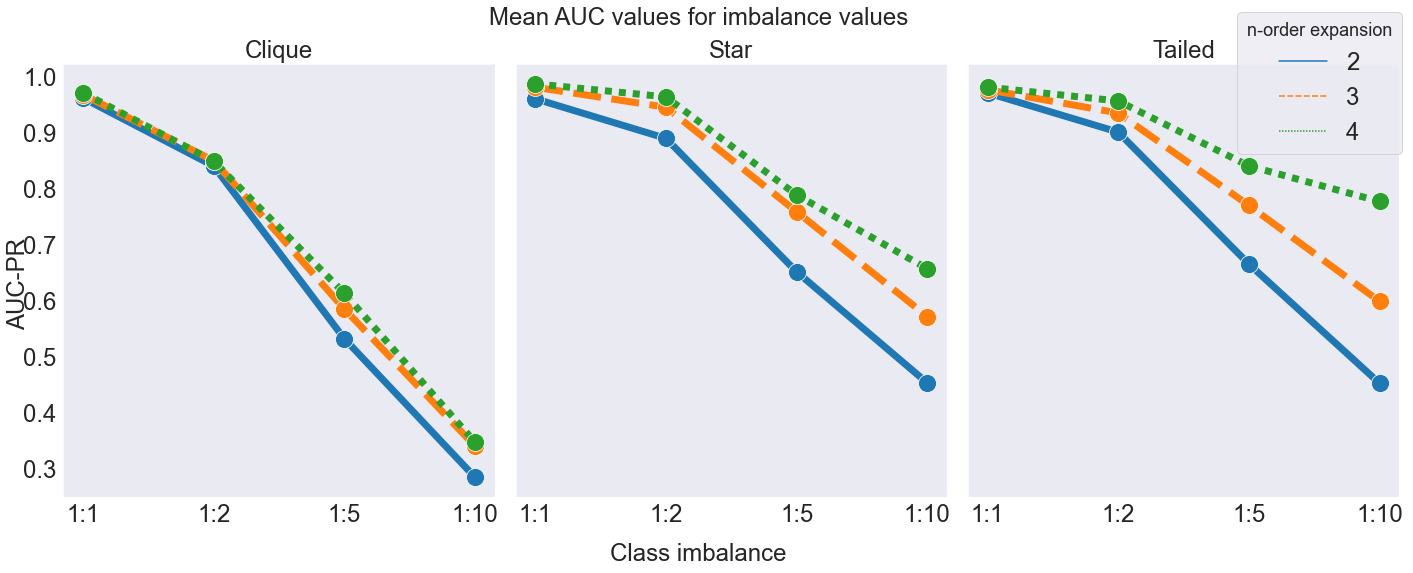

In [13]:
dframes = []
for x in IMBS:
    tdf = df[df.setting.str.contains(str(x) + "_seed-9")][["setting"] + list(df.filter(regex='PR'))].rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns")
    tdf['neg_sampling'] = tdf["setting"].apply(lambda row: getNegSampling(row, x))
    #tdf['neg_sampling'] = np.where(tdf['setting'].str.contains("_negtype-hub"), "hub_"+str(x), "clique_"+str(x))
    tdf = tdf.groupby(by="neg_sampling").mean()
    dframes.append(tdf)

imbs_df = pd.concat(dframes, axis=0)
fsize=24
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 8))
fig.suptitle("Mean AUC values for imbalance values", fontsize = fsize)

sns.lineplot(ax=axes[0], data=imbs_df[imbs_df.index.str.contains('clique')], marker='o', markersize=18, linewidth=7)
axes[0].set_title('Clique', fontsize=fsize)
axes[0].set_xlabel('')
axes[0].set_xticklabels(["1:" + str(imb) for imb in IMBS])
axes[0].grid()
axes[0].tick_params(axis='both', which='major', labelsize=fsize)

sns.lineplot(ax=axes[1], data=imbs_df[imbs_df.index.str.contains('star')], marker='o', markersize=18, linewidth=7)
axes[1].set_title('Star', fontsize = fsize)
axes[1].set_xlabel('')
axes[1].set_xticklabels(["1:" + str(imb) for imb in IMBS])
axes[1].grid()
axes[1].tick_params(axis='both', which='major', labelsize=fsize)

sns.lineplot(ax=axes[2], data=imbs_df[imbs_df.index.str.contains('tailed')], marker='o', markersize=18, linewidth=7)
axes[2].set_title('Tailed', fontsize = fsize)
axes[2].set_xlabel('')
axes[2].set_xticklabels(["1:" + str(imb) for imb in IMBS])
axes[2].grid()
axes[2].tick_params(axis='both', which='major', labelsize=fsize)

axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
axes[2].legend().set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
legend=fig.legend(handles, labels, title='n-order expansion', loc="upper right", fontsize=fsize)
plt.setp(legend.get_title(),fontsize=fsize-6)


fig.supxlabel('Class imbalance', fontsize=fsize)
fig.supylabel('AUC-PR', fontsize=fsize)

#plt.legend(title='n-order expansion')
plt.tight_layout()
plt.show()
del(imbs_df, dframes)

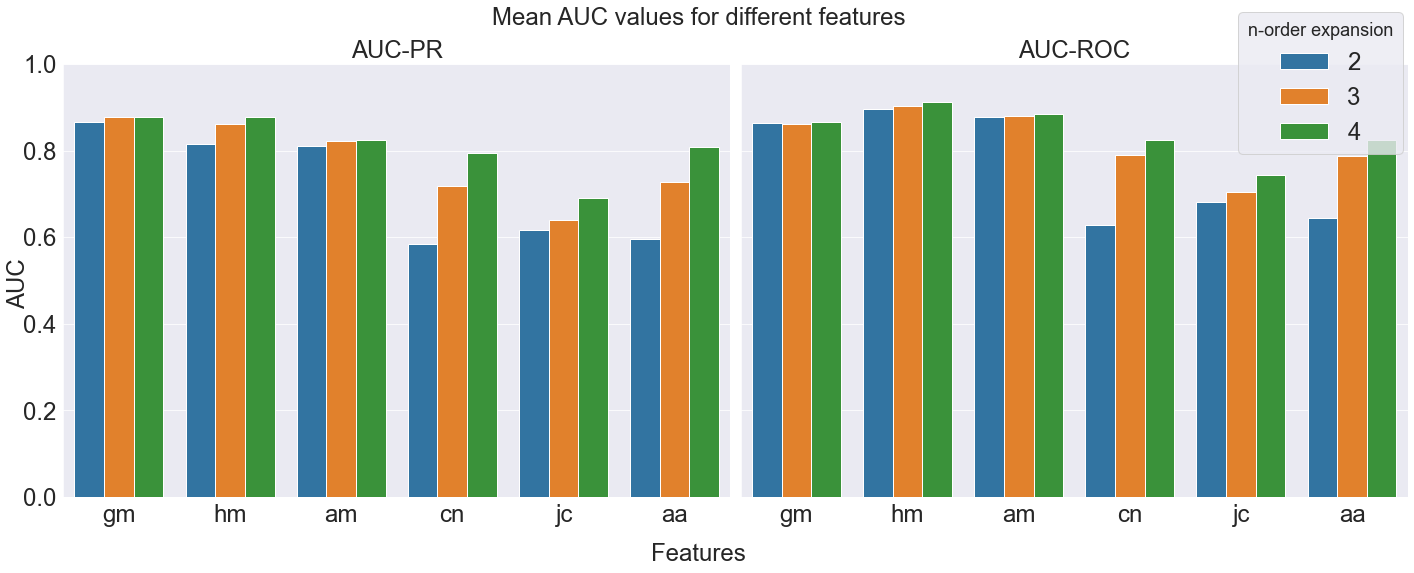

In [14]:
features_df = pd.concat([df[df.setting.str.contains("seed-9_" + x)].mean(axis=0) for x in FEATURES], keys=FEATURES, axis=1).transpose()
fsize=24
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
fig.suptitle("Mean AUC values for different features", fontsize = fsize)

features_df_pr = features_df[list(features_df.filter(regex='PR'))].rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns").transpose().reset_index().melt(id_vars=["index"])
sns.barplot(data=features_df_pr, ax=axes[0], x="variable", y="value", hue='index')
axes[0].set_title('AUC-PR', fontsize=fsize)
axes[0].tick_params(axis='both', which='major', labelsize=fsize)

features_df_roc = features_df[list(features_df.filter(regex='ROC'))].rename({"ROC1": "2", "ROC2": "3", "ROC3": "4"}, axis="columns").transpose().reset_index().melt(id_vars=["index"])
sns.barplot(data=features_df_roc, ax=axes[1], x="variable", y="value", hue='index')
axes[1].set_title('AUC-ROC', fontsize = fsize)
axes[1].tick_params(axis='both', which='major', labelsize=fsize)

axes[0].set(xlabel=None, ylabel=None)
axes[1].set(xlabel=None, ylabel=None)
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
legend=fig.legend(handles, labels, title='n-order expansion', loc="upper right", fontsize=fsize)
plt.setp(legend.get_title(),fontsize=fsize-6)

fig.supxlabel('Features', fontsize=fsize)
fig.supylabel('AUC', fontsize=fsize)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()
del(features_df_pr, features_df_roc)

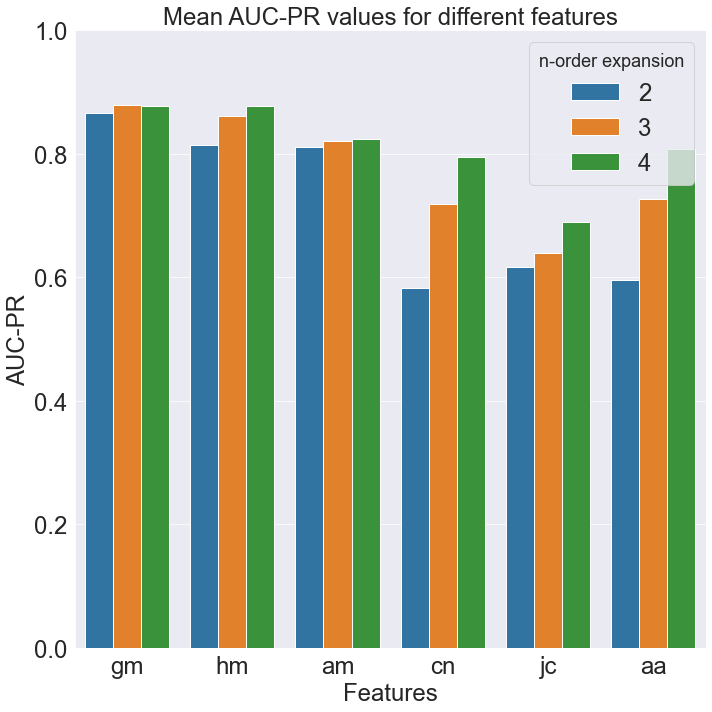

In [15]:
features_df = pd.concat([df[df.setting.str.contains("seed-9_" + x)].mean(axis=0) for x in FEATURES], keys=FEATURES, axis=1).transpose()
plt.figure(figsize=(10, 10))
fsize=24

features_df_pr = features_df[list(features_df.filter(regex='PR'))].rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns").transpose().reset_index().melt(id_vars=["index"])
barplot = sns.barplot(data=features_df_pr, x="variable", y="value", hue='index')


barplot.set_title("Mean AUC-PR values for different features", fontsize=fsize)
barplot.tick_params(axis='both', which='major', labelsize=fsize)

barplot.set(xlabel=None, ylabel=None)
barplot.legend().set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
legend=barplot.legend(handles, labels, title='n-order expansion', loc="upper right", fontsize=fsize)
plt.setp(legend.get_title(),fontsize=fsize-6)

barplot.set_xlabel('Features', fontsize=fsize)
barplot.set_ylabel('AUC-PR', fontsize=fsize)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()
del(features_df_pr)

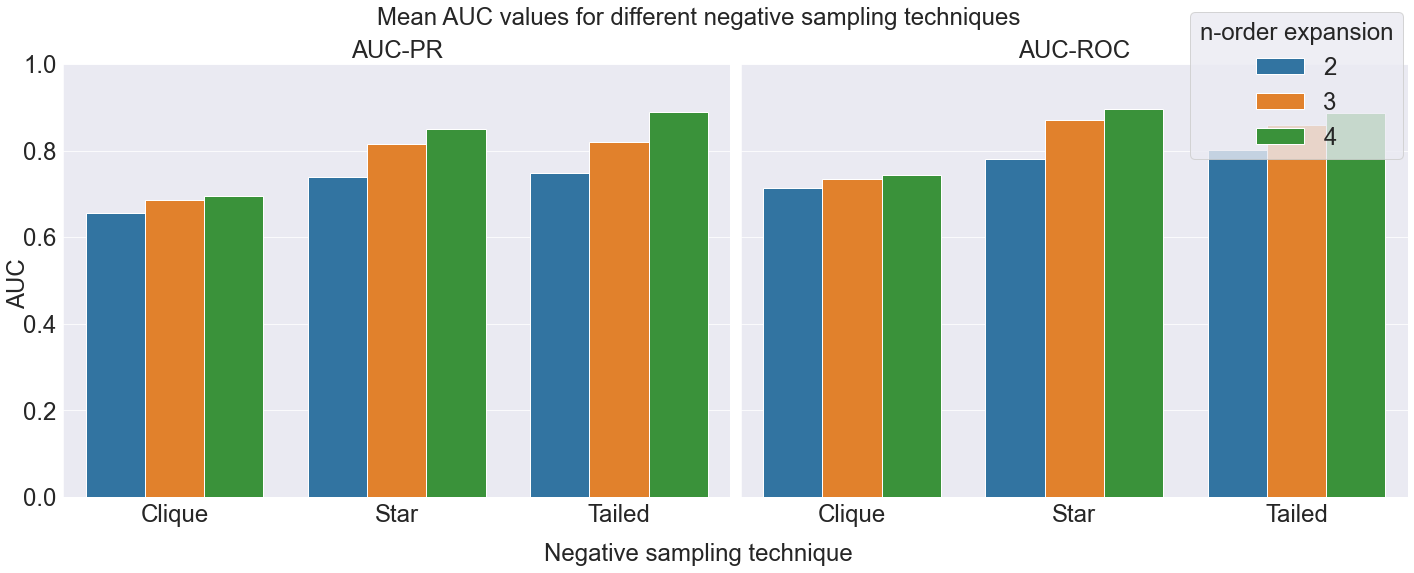

In [16]:
negtype_df = pd.concat([df[df.setting.str.contains("negtype-" + x)].mean(axis=0) for x in NEG_TYPES], keys=NEG_TYPES, axis=1).transpose()

fsize=24
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
fig.suptitle("Mean AUC values for different negative sampling techniques", fontsize = fsize)

negtype_df_pr = negtype_df[list(negtype_df.filter(regex='PR'))].rename({"PR1": "2", "PR2": "3", "PR3": "4"}, axis="columns").transpose().reset_index().melt(id_vars=["index"])
sns.barplot(data=negtype_df_pr, ax=axes[0], x="variable", y="value", hue='index')
axes[0].set_title('AUC-PR', fontsize=fsize)
axes[0].tick_params(axis='both', which='major', labelsize=fsize)

negtype_df_roc = negtype_df[list(negtype_df.filter(regex='ROC'))].rename({"ROC1": "2", "ROC2": "3", "ROC3": "4"}, axis="columns").transpose().reset_index().melt(id_vars=["index"])
sns.barplot(data=negtype_df_roc, ax=axes[1], x="variable", y="value", hue='index')
axes[1].set_title('AUC-ROC', fontsize = fsize)
axes[1].tick_params(axis='both', which='major', labelsize=fsize)

axes[0].set(xlabel=None, ylabel=None)
axes[1].set(xlabel=None, ylabel=None)
axes[0].set_xticklabels(["Clique", "Star", "Tailed"])
axes[1].set_xticklabels(["Clique", "Star", "Tailed"])
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)

handles, labels = plt.gca().get_legend_handles_labels()
legend=fig.legend(handles, labels, title='n-order expansion', loc="upper right", fontsize=fsize)
plt.setp(legend.get_title(),fontsize=fsize)

fig.supxlabel('Negative sampling technique', fontsize=fsize)
fig.supylabel('AUC', fontsize=fsize)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()